In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras import layers
import keras
from keras.layers import Dense, Activation, Dropout, Input
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

C:\Users\keert\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(x_train,y_train), (x_test,y_test)= fashion_mnist.load_data()

In [3]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


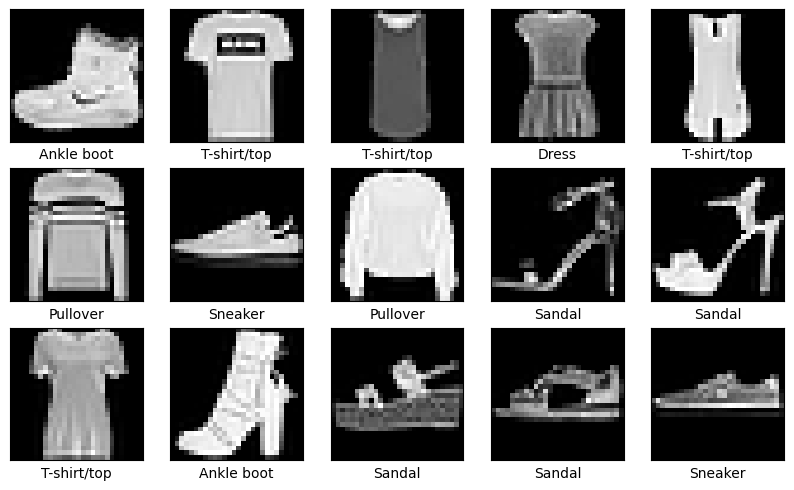

In [4]:
#Reshaping the dataset
x_train_reshape = x_train
x_test_reshape = x_test

#Names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

In [5]:
x_train= x_train.reshape(60000, 784)
x_test= x_test.reshape(10000, 784)
print (x_train.shape)
print (x_test.shape)
print (type(x_train))

(60000, 784)
(10000, 784)
<class 'numpy.ndarray'>


In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
model= keras.Sequential([
    Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

In [10]:
history=model.fit(x_train,y_train, batch_size=100,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - Accuracy: 0.6362 - loss: 1.0727 - val_Accuracy: 0.8156 - val_loss: 0.5444
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.7505 - loss: 0.7281 - val_Accuracy: 0.8242 - val_loss: 0.5042
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - Accuracy: 0.7770 - loss: 0.6627 - val_Accuracy: 0.8386 - val_loss: 0.4693
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.7892 - loss: 0.6306 - val_Accuracy: 0.8412 - val_loss: 0.4571
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - Accuracy: 0.8000 - loss: 0.6062 - val_Accuracy: 0.8459 - val_loss: 0.4841
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - Accuracy: 0.8014 - loss: 0.5982 - val_Accuracy: 0.8434 - val_loss: 0.6276
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - Accuracy: 0.8087 - loss: 0.5776 - val_Accuracy: 0.8501 - val_loss: 0.7114
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - Accuracy: 0.8111 - loss: 0.5671 - val_Accuracy: 0.

In [11]:
y_pred=model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.1205436e-05, 7.6622309e-05, 5.6903973e-06, ..., 6.0159415e-02,
        7.5618213e-05, 9.1474223e-01],
       [7.1073970e-04, 1.0178682e-05, 9.1055232e-01, ..., 3.7230452e-06,
        1.3033707e-04, 7.4444426e-07],
       [2.2793922e-07, 9.9999976e-01, 8.9350818e-11, ..., 3.5745558e-09,
        1.0593866e-10, 3.8260617e-09],
       ...,
       [1.0487261e-02, 9.7814394e-05, 1.2312600e-03, ..., 9.3841617e-04,
        9.6770769e-01, 4.9522909e-04],
       [3.7213129e-06, 9.9997830e-01, 5.5065346e-08, ..., 5.2667860e-07,
        1.5427789e-08, 1.0296399e-06],
       [7.4652002e-05, 8.4545834e-05, 4.8280682e-04, ..., 2.7156442e-02,
        6.5213657e-04, 4.8999088e-03]], dtype=float32)

In [12]:
y_predict= np.argmax(y_pred, axis=1)
y_test_eval= np.argmax(y_test, axis=1)

In [13]:
cm=confusion_matrix(y_test_eval, y_predict)


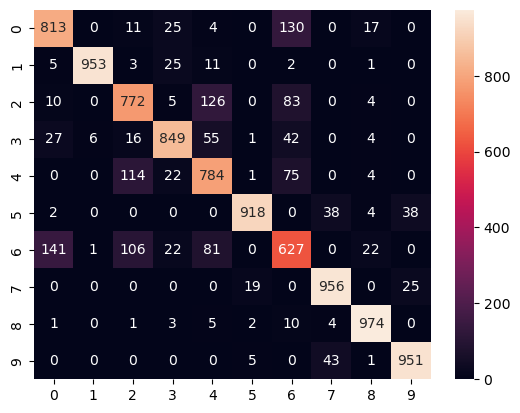

In [14]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [15]:
print (classification_report(y_test_eval, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.77      0.76      1000
           3       0.89      0.85      0.87      1000
           4       0.74      0.78      0.76      1000
           5       0.97      0.92      0.94      1000
           6       0.65      0.63      0.64      1000
           7       0.92      0.96      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



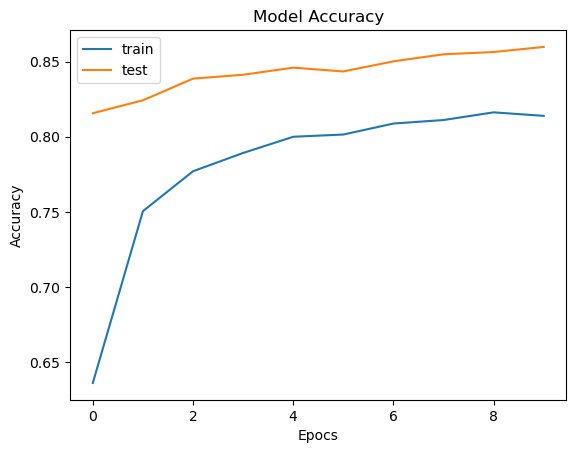

In [16]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epocs")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()

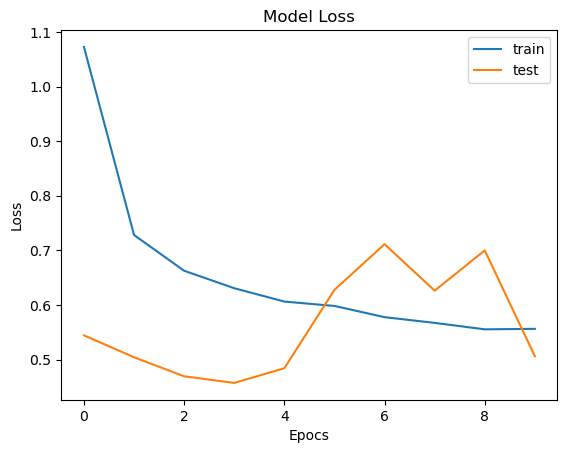

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epocs")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc='best')
plt.show()

In [18]:
y_pred_single=model.predict(x_test[[8]])
y_predict_single= np.argmax(y_pred_single, axis=1 )

y_test_eval= np.argmax(y_test, axis=1 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


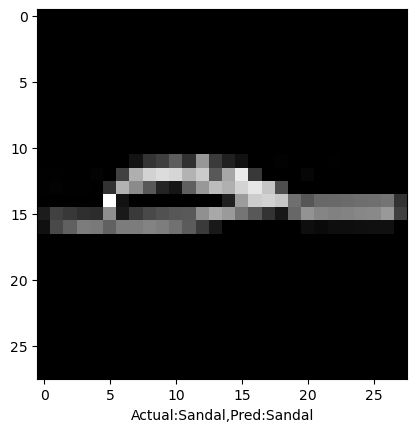

In [19]:
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.imshow(x_test_reshape[8], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test[8])], col_names[y_predict_single[0]]))
plt.show()